## Defining constants

In [141]:
INPUT_FILE = "../data/original/data.csv"
IMG_LOC = "../img"

## Import necessary libraries

In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import preprocessing
import math
import warnings
warnings.filterwarnings("ignore")


## Loading original dataset

In [14]:
# Load the dataset
csvFile = INPUT_FILE
dataset = pd.read_csv(csvFile)

# Removing the limit of display, so we would be able to see data types contained in few rows
pd.set_option('display.max_columns', None)  
display(dataset.head(2))


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

### Replacing dataset column names for comfortable parameter management.

In [104]:
dataset.columns = dataset.columns.str.replace('[#,@,&, ,(,),%,/,¥,-,?]', '')
display(dataset.columns)

C:\Users\DEIVID~1\AppData\Local\Temp/ipykernel_14908/2007085566.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.columns = dataset.columns.str.replace('[#,@,&, ,(,),%,/,¥,-,?]', '')


Index(['Bankrupt', 'ROACbeforeinterestanddepreciationbeforeinterest',
       'ROAAbeforeinterestandaftertax',
       'ROABbeforeinterestanddepreciationaftertax', 'OperatingGrossMargin',
       'RealizedSalesGrossMargin', 'OperatingProfitRate',
       'PretaxnetInterestRate', 'AftertaxnetInterestRate',
       'Nonindustryincomeandexpenditurerevenue',
       'Continuousinterestrateaftertax', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interestbearingdebtinterestrate', 'TaxrateA', 'NetValuePerShareB',
       'NetValuePerShareA', 'NetValuePerShareC',
       'PersistentEPSintheLastFourSeasons', 'CashFlowPerShare',
       'RevenuePerShareYuan', 'OperatingProfitPerShareYuan',
       'PerShareNetprofitbeforetaxYuan', 'RealizedSalesGrossProfitGrowthRate',
       'OperatingProfitGrowthRate', 'AftertaxNetProfitGrowthRate',
       'RegularNetProfitGrowthRate', 'ContinuousNetProfitGrowthRate',
       'TotalAssetGrowthRate', 'NetValueGrowthRate',
     

## Dataframe variable types

In [105]:
var_types = pd.DataFrame(dataset.dtypes, columns=['vartype'])

# Grouping by variable types contained in dataset 
grouped_var_types = var_types.groupby(['vartype'])['vartype'].count()
display(grouped_var_types)

vartype
int64       3
float64    93
Name: vartype, dtype: int64

In [109]:
# Getting more detailed info about other variables
for n in enumerate(grouped_var_types.keys().values.tolist()):
    display(pd.DataFrame(var_types[var_types.vartype == str(n[1])].vartype))

,vartype
Bankrupt,int64
LiabilityAssetsFlag,int64
NetIncomeFlag,int64


,vartype
ROACbeforeinterestanddepreciationbeforeinterest,float64
ROAAbeforeinterestandaftertax,float64
ROABbeforeinterestanddepreciationaftertax,float64
OperatingGrossMargin,float64
RealizedSalesGrossMargin,float64
...,...
NetIncometoStockholder'sEquity,float64
LiabilitytoEquity,float64
DegreeofFinancialLeverageDFL,float64
InterestCoverageRatioInterestexpensetoEBIT,float64


## Recieving information about our datasets NaN (non existing - null) values

In [110]:
display(pd.DataFrame(dataset.isna().sum()).T)

,Bankrupt,ROACbeforeinterestanddepreciationbeforeinterest,ROAAbeforeinterestandaftertax,ROABbeforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,PretaxnetInterestRate,AftertaxnetInterestRate,Nonindustryincomeandexpenditurerevenue,Continuousinterestrateaftertax,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interestbearingdebtinterestrate,TaxrateA,NetValuePerShareB,NetValuePerShareA,NetValuePerShareC,PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShareYuan,OperatingProfitPerShareYuan,PerShareNetprofitbeforetaxYuan,RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,AftertaxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment,CurrentRatio,QuickRatio,InterestExpenseRatio,TotaldebtTotalnetworth,Debtratio,NetworthAssets,LongtermfundsuitabilityratioA,Borrowingdependency,ContingentliabilitiesNetworth,OperatingprofitPaidincapital,NetprofitbeforetaxPaidincapital,InventoryandaccountsreceivableNetvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRatetimes,FixedAssetsTurnoverFrequency,NetWorthTurnoverRatetimes,Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssetsTotalAssets,CurrentAssetsTotalAssets,CashTotalAssets,QuickAssetsCurrentLiability,CashCurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,InventoryWorkingCapital,InventoryCurrentLiability,CurrentLiabilitiesLiability,WorkingCapitalEquity,CurrentLiabilitiesEquity,LongtermLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,TotalincomeTotalexpense,TotalexpenseAssets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLongtermLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,LiabilityAssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,NocreditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverageDFL,InterestCoverageRatioInterestexpensetoEBIT,NetIncomeFlag,EquitytoLiability
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dataset information, about distributions, Cardinality, Quartiles...

In [132]:
output = dataset.describe().append(pd.Series(dataset.isnull().sum(axis=0) , name='NaNs'))
output = output.append(pd.Series(dataset.apply(pd.Series.nunique), name="Cardinality"))
display(output)

,Bankrupt,ROACbeforeinterestanddepreciationbeforeinterest,ROAAbeforeinterestandaftertax,ROABbeforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,PretaxnetInterestRate,AftertaxnetInterestRate,Nonindustryincomeandexpenditurerevenue,Continuousinterestrateaftertax,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interestbearingdebtinterestrate,TaxrateA,NetValuePerShareB,NetValuePerShareA,NetValuePerShareC,PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShareYuan,OperatingProfitPerShareYuan,PerShareNetprofitbeforetaxYuan,RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,AftertaxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment,CurrentRatio,QuickRatio,InterestExpenseRatio,TotaldebtTotalnetworth,Debtratio,NetworthAssets,LongtermfundsuitabilityratioA,Borrowingdependency,ContingentliabilitiesNetworth,OperatingprofitPaidincapital,NetprofitbeforetaxPaidincapital,InventoryandaccountsreceivableNetvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRatetimes,FixedAssetsTurnoverFrequency,NetWorthTurnoverRatetimes,Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssetsTotalAssets,CurrentAssetsTotalAssets,CashTotalAssets,QuickAssetsCurrentLiability,CashCurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,InventoryWorkingCapital,InventoryCurrentLiability,CurrentLiabilitiesLiability,WorkingCapitalEquity,CurrentLiabilitiesEquity,LongtermLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,TotalincomeTotalexpense,TotalexpenseAssets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLongtermLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,LiabilityAssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,NocreditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverageDFL,InterestCoverageRatioInterestexpensetoEBIT,NetIncomeFlag,EquitytoLiability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,0.374654,0.005968,0.108977,0.182715,0.402459,0.141606,1.278971e+07,9.826221e+06,2.149106e+09,1.008596e+09,

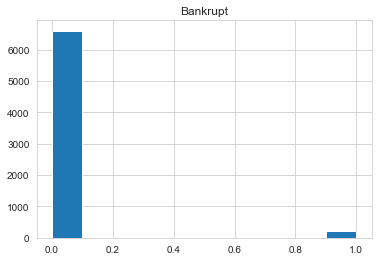

## Correlation table

Variables Correlations


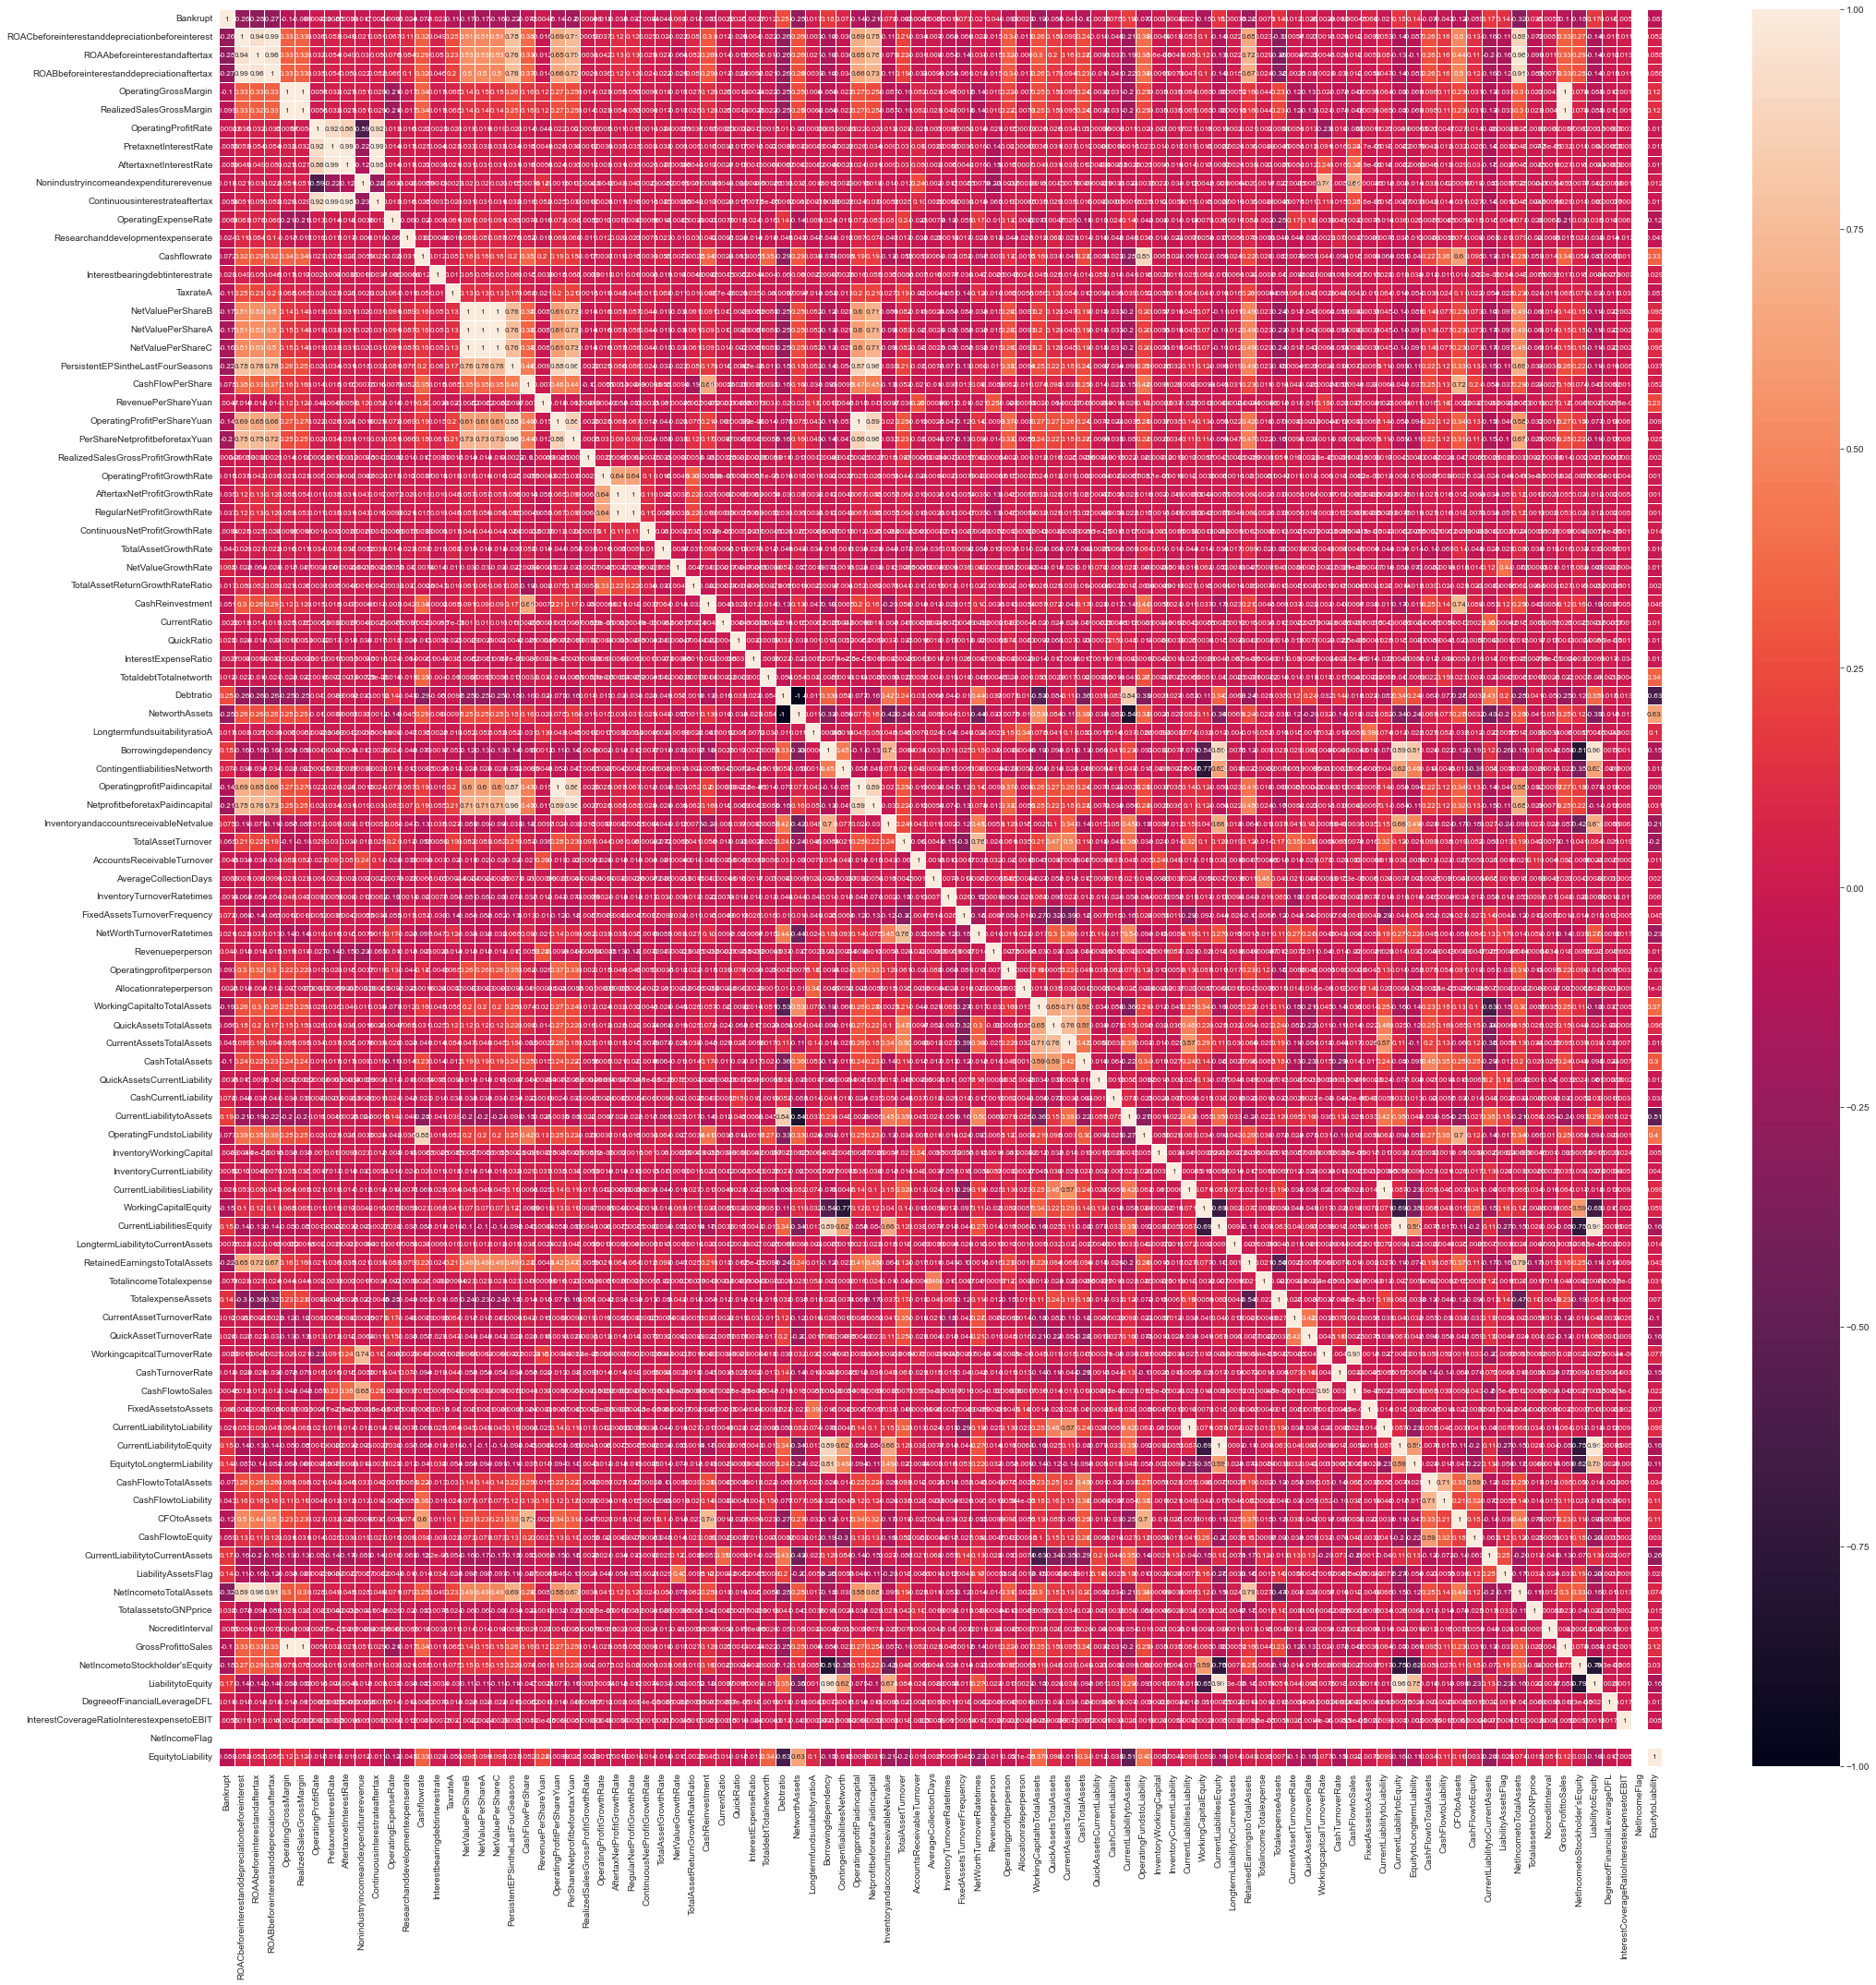

,Bankrupt,ROACbeforeinterestanddepreciationbeforeinterest,ROAAbeforeinterestandaftertax,ROABbeforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,PretaxnetInterestRate,AftertaxnetInterestRate,Nonindustryincomeandexpenditurerevenue,Continuousinterestrateaftertax,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interestbearingdebtinterestrate,TaxrateA,NetValuePerShareB,NetValuePerShareA,NetValuePerShareC,PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShareYuan,OperatingProfitPerShareYuan,PerShareNetprofitbeforetaxYuan,RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,AftertaxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment,CurrentRatio,QuickRatio,InterestExpenseRatio,TotaldebtTotalnetworth,Debtratio,NetworthAssets,LongtermfundsuitabilityratioA,Borrowingdependency,ContingentliabilitiesNetworth,OperatingprofitPaidincapital,NetprofitbeforetaxPaidincapital,InventoryandaccountsreceivableNetvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRatetimes,FixedAssetsTurnoverFrequency,NetWorthTurnoverRatetimes,Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssetsTotalAssets,CurrentAssetsTotalAssets,CashTotalAssets,QuickAssetsCurrentLiability,CashCurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,InventoryWorkingCapital,InventoryCurrentLiability,CurrentLiabilitiesLiability,WorkingCapitalEquity,CurrentLiabilitiesEquity,LongtermLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,TotalincomeTotalexpense,TotalexpenseAssets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLongtermLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,LiabilityAssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,NocreditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverageDFL,InterestCoverageRatioInterestexpensetoEBIT,NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.6102

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Variables Correlations")
# corrMatrix = dataset[['Bankrupt', 'ROACbeforeinterestanddepreciationbeforeinterest',"ROAAbeforeinterestandaftertax"]].corr()
corrMatrix = dataset.corr()

fig, ax = plt.subplots(figsize=(35,35)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax, annot_kws={"size": 8},)
plt.show()
fig.savefig(IMG_LOC +"/company_bankruptcy-correlation-table.png") 

dataset.head()
